<a href="https://colab.research.google.com/github/ermilova/jb_internship/blob/main/jb_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gitpython

     |████████████████████████████████| 163kB 2.7MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 


In [25]:
from git import Repo, Commit


repo = Repo.clone_from('https://github.com/facebook/react.git', '/tmp/xxx')


SyntaxError: ignored

In [48]:
commits = list(repo.iter_commits('master'))

In [62]:
import matplotlib.pyplot as plt
import networkx as nx
import sys, errno
G = nx.Graph()

In [73]:
authorFile = dict() 
for commit in commits:
    try:
        files = commit.stats.files
        for commitfile in files:
            authorFile.setdefault(str(commit.author.name), []).append(str(commitfile)) 
    except IOError as e:
        pass

for author1 in authorFile:
    for author2 in authorFile:
        w = len(list(set(authorFile[author2]).intersection(authorFile[author1])))
        if (w != 0):
            G.add_edge(author1, author2, weight=w)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12493 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30742 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20234 missing from current font.
  font.set_

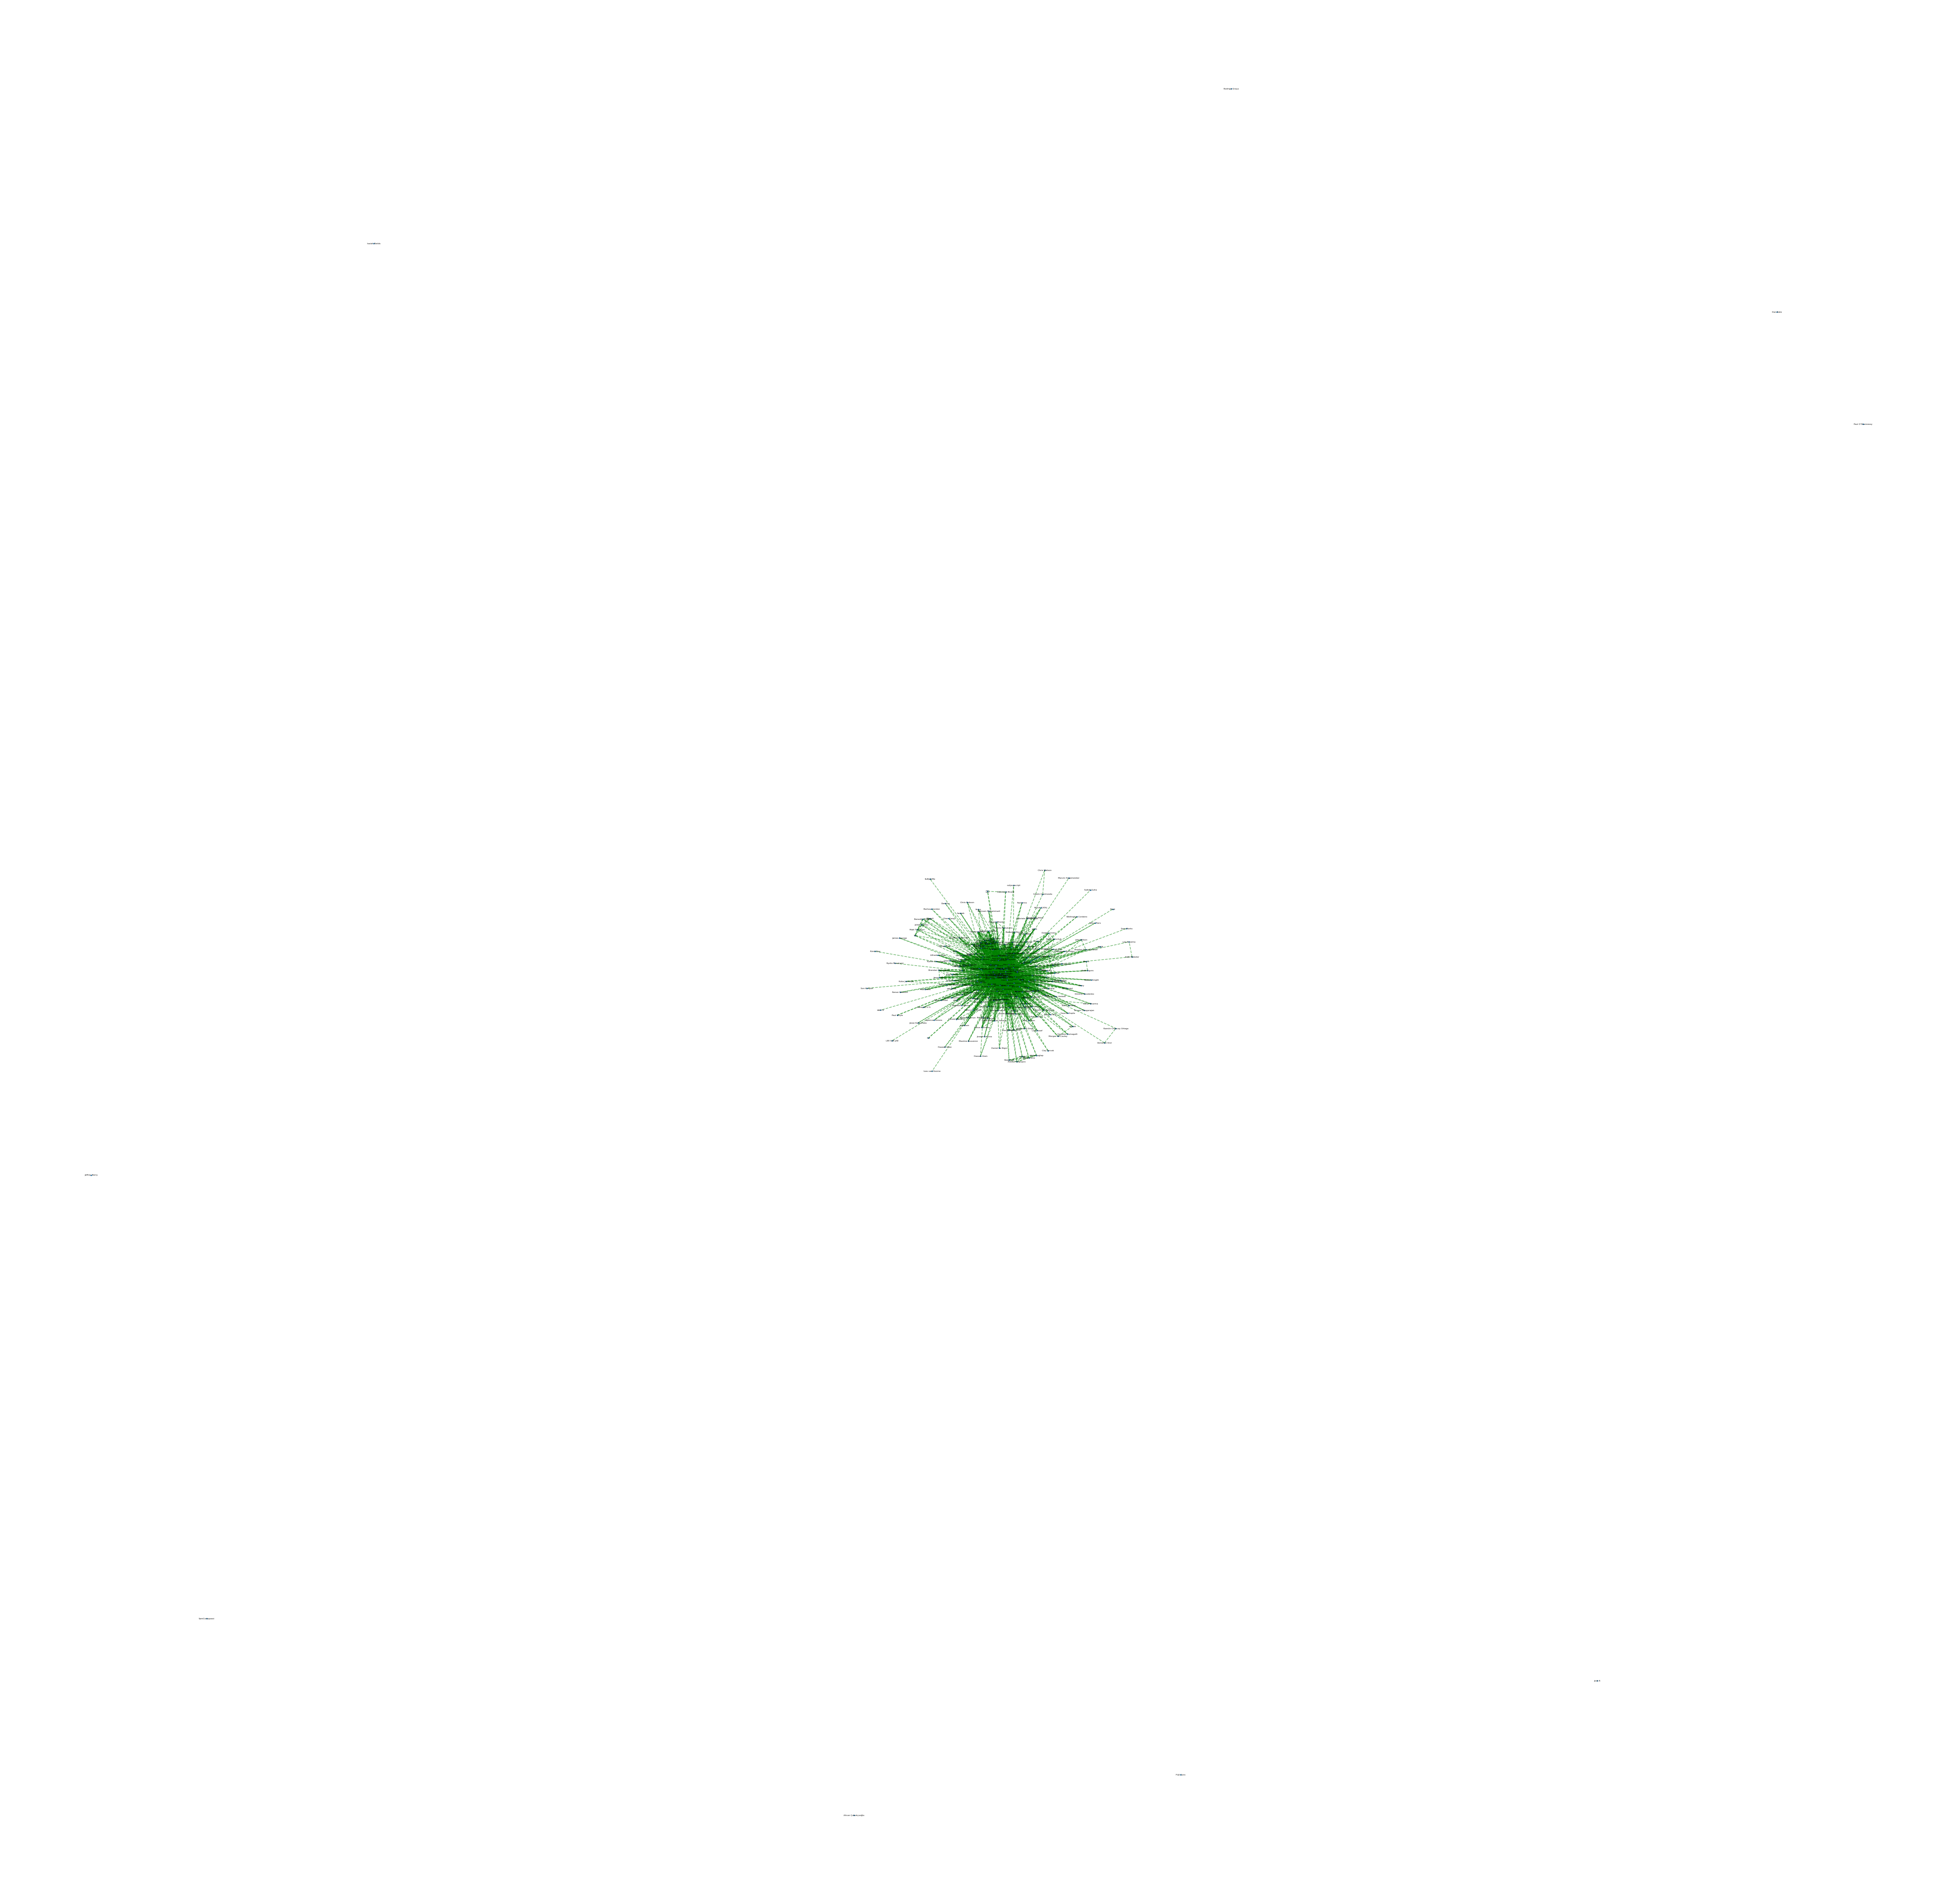

<Figure size 7200x7200 with 0 Axes>

In [79]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=7)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2, edge_color="b")
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="g", style="dashed"
)
# labels
nx.draw_networkx_labels(G, pos, font_size=6, font_family="sans-serif")
plt.rcParams["figure.figsize"] = (100,100)
# plt.figure(figsize=(1,1), )
plt.axis("off")
plt.show()
plt.clf()